# Introduction to Tensorflow

In TensorFlow, we have to set up the data, variables, placeholders, and model before we
tell the program to train and change the variables to improve the predictions. TensorFlow
accomplishes this through the computational graphs. These computational graphs are a
directed graphs with no recursion, which allows for computational parallelism. We create a
loss function for TensorFlow to minimize. TensorFlow accomplishes this by modifying the
variables in the computational graph. Tensorflow knows how to modify the variables because
it keeps track of the computations in the model and automatically computes the gradients
for every variable. Because of this, we can see how easy it can be to make changes and try
different data sources.


### Declaring tensors

Tensors are the primary data structure that TensorFlow uses to operate on the computational
graph. We can declare these tensors as variables and or feed them in as placeholders. First
we must know how to create tensors.

When we create a tensor and declare it to be a variable, TensorFlow creates several graph
structures in our computation graph. It is also important to point out that just by creating
a tensor, TensorFlow is not adding anything to the computational graph. TensorFlow does
this only after creating available out of the tensor.

### Fixed tensors:

In [1]:
import tensorflow as tf

row_dim = 100
col_dim = 100

# Create a zero filled tensor. Use the following:
zero_tsr = tf.zeros([row_dim, col_dim])

# Create a one filled tensor. Use the following:
ones_tsr = tf.ones([row_dim, col_dim])

# Create a constant filled tensor. Use the following:
filled_tsr = tf.fill([row_dim, col_dim], 42)

# Create a tensor out of an existing constant. Use the following:
constant_tsr = tf.constant([1,2,3])

### Tensors of similar shape

In [2]:

# We can also initialize variables based on the shape of other tensors, as
# follows:
zeros_similar = tf.zeros_like(constant_tsr)
print(zeros_similar.shape)
ones_similar = tf.ones_like(constant_tsr)
print(ones_similar.shape)

(3,)
(3,)


### Sequence Tensors

In [3]:
# TensorFlow allows us to specify tensors that contain defined intervals.
# The following functions behave very similarly to the range() outputs and
# numpy's linspace() outputs. See the following function:

linear_tsr = tf.linspace(start=0., stop=1., num=3)
# The resulting tensor is the sequence [0.0, 0.5, 1.0] . Note that this
# function includes the specified stop value. See the following function:


integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
# The result is the sequence [6, 9, 12]. Note that this function does not include
# the limit value.

### Printing a tensor

In [4]:
sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# print_op = tf.print(linear_tsr)
print(sess.run(linear_tsr))
print(sess.run(integer_seq_tsr))
sess.close()
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.constant([1.0, 3.0])

# Add print operation
a = tf.Print(a, [a], message="This is a: ")

a.eval()


[0.  0.5 1. ]
[ 6  9 12]


array([1., 3.], dtype=float32)

### Random Tensors

In [5]:
# The following generated random numbers are from a uniform distribution:
randunif_tsr = tf.random_uniform([row_dim, col_dim],minval=0, maxval=1)

# Note that this random uniform distribution draws from the interval that
# includes the minval but not the maxval ( minval <= x < maxval ).
# To get a tensor with random draws from a normal distribution, as follows:
randnorm_tsr = tf.random_normal([row_dim, col_dim],mean=0.0, stddev=1.0)

# There are also times when we wish to generate normal random values that
# are assured within certain bounds. The truncated_normal() function
# always picks normal values within two standard deviations of the specified
# mean. See the following:
runcnorm_tsr = tf.truncated_normal([row_dim, col_dim],mean=0.0, stddev=1.0)

In [6]:
runcnorm_tsr.eval()

array([[ 1.3976027 , -0.18463625, -0.7123042 , ..., -0.39387956,
         0.58614224,  0.3350849 ],
       [ 1.2229058 ,  1.014937  , -1.731907  , ...,  0.10917962,
        -1.6860263 ,  0.06779347],
       [ 0.1381951 , -0.35920018,  0.04388177, ...,  1.289667  ,
         0.8832476 , -1.1727388 ],
       ...,
       [-1.1578246 ,  1.1584009 ,  1.1673744 , ..., -0.27750298,
        -1.4496876 ,  0.75408363],
       [ 0.4315164 , -0.78856283, -0.02895579, ...,  1.1594352 ,
         1.2009617 , -1.2255534 ],
       [ 1.3678681 , -0.12290154,  0.08521585, ..., -1.0783877 ,
         0.11354323,  1.1957997 ]], dtype=float32)

In [7]:
# We might also be interested in randomizing entries of arrays. To accomplish
# this, there are two functions that help us: random_shuffle() and
# random_crop() . See the following:
input_tensor = runcnorm_tsr
crop_size = [row_dim//2, col_dim//2]
shuffled_output = tf.random_shuffle(input_tensor)
cropped_output = tf.random_crop(input_tensor, crop_size)

# We will be interested in randomly cropping an image
# of size (height, width, 3) where there are three color spectrums. To fix a
# dimension in the cropped_output , you must give it the maximum size in
# that dimension:

#### cropped_image = tf.random_crop(my_image, [height/2, width/2,3])

### Placeholders and variables

Variables are the parameters of the algorithm and TensorFlow keeps track of how
to change these to optimize the algorithm

The main way to create a variable is by using the Variable() function, which takes a tensor
as an input and outputs a variable. This is the declaration and we still need to initialize
the variable. Initializing is what puts the variable with the corresponding methods on the
computational graph. Here is an example of creating and initializing a variable:

In [8]:
my_var = tf.Variable(tf.zeros([2,3]))
sess = tf.Session()
initialize_op = tf.global_variables_initializer ()
sess.run(initialize_op)

In [9]:
print(sess.run(my_var))

[[0. 0. 0.]
 [0. 0. 0.]]


A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders from a feed_dict argument in the session. 

To put a placeholder in the graph, we must perform at least one operation on the placeholder. We initialize the graph, declare x to be a placeholder, and define y as the identity operation on x , which just returns x . We then create data to feed into the x placeholder and run the identity operation.

In [10]:
import numpy as  np
sess = tf.Session()
x = tf.placeholder(tf.float32, shape=[2,2])
y = tf.identity(x) # Return a tensor with the same shape and contents as input.
x_vals = np.random.rand(2,2)
sess.run(y, feed_dict={x: x_vals})

array([[0.96056557, 0.503737  ],
       [0.2833927 , 0.30986616]], dtype=float32)

During the run of the computational graph, we have to tell TensorFlow when to initialize the
variables we have created. TensorFlow must be informed about when it can initialize the
variables. While each variable has an initializer method, the most common way to do
this is to use the helper function, which is global_variables_initializer() .
This function creates an operation in the graph that initializes all the variables we have
created, as follows:
    
initializer_op = tf.global_variables_initializer ()

### Working with matrices

#### Creating matrices

Creating matrices: We can create two-dimensional matrices from numpy arrays or
nested lists. We can also use the
tensor creation functions and specify a two-dimensional shape for functions such
as zeros() , ones() , truncated_normal() , and so on. TensorFlow also allows
us to create a diagonal matrix from a one-dimensional array or list with the function
diag() , as follows:


In [11]:
identity_matrix = tf.diag([1.0, 1.0, 1.0])
A = tf.truncated_normal([2, 3])
B = tf.fill([2,3], 5.0)
C = tf.random_uniform([3,2])
D = tf.convert_to_tensor(np.array([[1., 2., 3.],[-3., -7.,-1.],[0., 5., -2.]]))

print(sess.run(identity_matrix))
print(sess.run(A))
print(sess.run(B))
print(sess.run(C))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.28541327  1.4856031  -0.11091355]
 [ 0.49297258 -1.0647209  -0.9786521 ]]
[[5. 5. 5.]
 [5. 5. 5.]]
[[0.3880278  0.77504754]
 [0.7160107  0.3825178 ]
 [0.47572005 0.01854134]]


In [12]:
# Addition and subtraction uses the following:
print(sess.run(A+B))
print(sess.run(B-B))

# Multiplication
print(sess.run(tf.matmul(B, identity_matrix)))

# Transpose the arguments as follows:
print(sess.run(tf.transpose(C)))

# determinant of a matrix
print(sess.run(tf.matrix_determinant(D)))

# inverse of a matrix
print(sess.run(tf.matrix_inverse(D)))

# For Eigenvalues and eigenvectors, use the following code:
print(sess.run(tf.self_adjoint_eig(D)))

[[3.8633952 5.014917  5.7586617]
 [5.1781    6.6690445 3.4166389]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[5. 5. 5.]
 [5. 5. 5.]]
[[0.13826811 0.28341222 0.9185896 ]
 [0.88222086 0.27464986 0.09976423]]
-37.99999999999999
[[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]
(array([-10.65907521,  -0.22750691,   2.88658212]), array([[ 0.21749542,  0.63250104, -0.74339638],
       [ 0.84526515,  0.2587998 ,  0.46749277],
       [-0.4880805 ,  0.73004459,  0.47834331]]))


### Operations

In [13]:
# It is worth mentioning that div() returns the same type as the inputs.
# This means it really returns the floor of the division (akin to Python 2) if the inputs
# are integers. To return the Python 3 version, which casts integers into floats before
# dividing and always returning a float, TensorFlow provides the function truediv()
# function, as shown as follows:
print(sess.run(tf.div(3,4)))

print(sess.run(tf.truediv(3,4)))

# If we have floats and want an integer division, we can use the function floordiv() .
# Note that this will still return a float, but rounded down to the nearest integer. The
# function is shown as follows:
print(sess.run(tf.floordiv(3.0,4.0)))

# Another important function is mod() . This function returns the remainder after the
# division. It is shown as follows:
print(sess.run(tf.mod(22.0, 5.0)))

# The cross-product between two tensors is achieved by the cross() function.
# Remember that the cross-product is only defined for two three-dimensional vectors,
# so it only accepts two three-dimensional tensors. The function is shown as follows:
print(sess.run(tf.cross([1., 0., 0.], [0., 1., 0.])))

0
0.75
0.0
2.0
[0. 0. 1.]


In [14]:
### Custom Polynomial
# If we wish to add other operations to our graphs that are not listed here, we must create our
# own from the preceding functions. Here is an example of an operation not listed previously
# that we can add to our graph. We choose to add a custom polynomial function 3x**2 -x + 10:
    
def custom_polynomial(x):
    return(tf.subtract(3 * tf.square(x), x) + 10)
print(sess.run(custom_polynomial(11)))

362


### Activation Functions

In [15]:
# The rectified linear unit, known as ReLU, is the most common and basic way to
# introduce a non-linearity into neural networks. This function is just max(0,x) . It is
# continuous but not smooth. It appears as follows:
print(sess.run(tf.nn.relu([-3., 3., 10.])))

[ 0.  3. 10.]


In [16]:
# There will be times when we wish to cap the linearly increasing part of the preceding
# ReLU activation function. We can do this by nesting the max(0,x) function into
# a min() function. The implementation that TensorFlow has is called the ReLU6
# function. This is defined as min(max(0,x),6). This is a version of the hard-
# sigmoid function and is computationally faster, and does not suffer from vanishing
# (infinitesimally near zero) or exploding values. 
print(sess.run(tf.nn.relu6([-3., 3., 10.])))

[0. 3. 6.]


In [17]:
# The sigmoid function is the most common continuous and smooth activation
# function. It is also called a logistic function and has the form 1/(1+exp(-x)). The
# sigmoid is not often used because of the tendency to zero-out the back propagation
# terms during training. It appears as follows:
print(sess.run(tf.nn.sigmoid([-1., 0., 1.])))

[0.26894143 0.5        0.7310586 ]


In [18]:
# Another smooth activation function is the hyper tangent. The hyper tangent function
# is very similar to the sigmoid except that instead of having a range between 0 and
# 1 , it has a range between -1 and 1 . The function has the form of the ratio of the
# hyperbolic sine over the hyperbolic cosine. But another way to write this is ((exp(x)-
# exp(-x))/(exp(x)+exp(-x)). It appears as follows:
print(sess.run(tf.nn.tanh([-1., 0., 1.])))

[-0.7615942  0.         0.7615942]


In [19]:
# The softsign function also gets used as an activation function. The form of this
# function is x/(abs(x) + 1). The softsign function is supposed to be a continuous
# approximation to the sign function. It appears as follows:
print(sess.run(tf.nn.softsign([-1., 0., -1.])))

[-0.5  0.  -0.5]


In [20]:
# Another function, the softplus , is a smooth version of the ReLU function. The form
# of this function is log(exp(x) + 1). It appears as follows:
print(sess.run(tf.nn.softplus([-1., 0., -1.])))

[0.31326166 0.6931472  0.31326166]


In [21]:
# The softplus goes to infinity as the input increases whereas
# the softsign goes to 1. As the input gets smaller, however, the
# softplus approaches zero and the softsign goes to -1.
# The Exponential Linear Unit (ELU) is very similar to the softplus function except
# that the bottom asymptote is -1 instead of 0 . The form is (exp(x)+1) if x < 0 else x. It
# appears as follows:
print(sess.run(tf.nn.elu([-1., 0., -1.])))

[-0.63212055  0.         -0.63212055]


### Operations in a computational graph

In [22]:
# First we declare our tensors and placeholders. Here we will create a numpy array to
# feed into our operation:
import numpy as np
x_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
m_const = tf.constant(3.)
my_product = tf.multiply(x_data, m_const)
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data: x_val}))

3.0
9.0
15.0
21.0
27.0


![Fig](imgs/img_001.png)

### Layering Nested Operations

It's important to know how to chain operations together. This will set up layered operations in
the computational graph. For a demonstration we will multiply a placeholder by two matrices
and then perform addition. We will feed in two matrices in the form of a three-dimensional
numpy array.

In [23]:
# First we create the data to feed in and the corresponding placeholder:
my_array = np.array([[1., 3., 5., 7., 9.],[-2., 0., 2., 4., 6.],[-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array + 1])
x_data = tf.placeholder(tf.float32, shape=(3, 5))

# Next we create the constants that we will use for matrix multiplication and addition:
m1 = tf.constant([[1.],[0.],[-1.],[2.],[4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

# Now we declare the operations and add them to the graph:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

# Finally, we feed the data through our graph:
for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


![Fig](imgs/img_002.png)

### Implementing loss functions

Loss functions are very important to machine learning algorithms. They measure the distance
between the model outputs and the target (truth) values.

In [24]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

# The L2 norm loss is also known as the Euclidean loss function. It is just the square
# of the distance to the target. Here we will compute the loss function as if the target
# is zero. The L2 norm is a great loss function because it is very curved near the
# target and algorithms can use this fact to converge to the target more slowly, the
# closer it gets., as follows:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

In [25]:
# The L1 norm loss is also known as the absolute loss function. Instead of squaring
# the difference, we take the absolute value. The L1 norm is better for outliers than
# the L2 norm because it is not as steep for larger values. One issue to be aware of
# is that the L1 norm is not smooth at the target and this can result in algorithms not
# converging well. It appears as follows:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

In [27]:
# Pseudo-Huber loss is a continuous and smooth approximation to the Huber loss
# function. This loss function attempts to take the best of the L1 and L2 norms by
# being convex near the target and less steep for extreme values. The form depends on
# an extra parameter, delta, which dictates how steep it will be. We will plot two forms,
# delta1 = 0.25 and delta2 = 5 to show the difference, as follows:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

In [29]:
# Cross-entropy loss for a binary classfication case is also sometimes referred to as the logistic loss
# function. It comes about when we are predicting the two classes 0 or 1 . We wish to
# measure a distance from the actual class ( 0 or 1 ) to the predicted value, which is
# usually a real number between 0 and 1 . To measure this distance, we can use the
# cross entropy formula from information theory, as follows:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. -target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

In [31]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

In [33]:
# Sigmoid cross entropy loss is very similar to the previous loss function
# except we transform the x-values by the sigmoid function before we put them in
# the cross entropy loss, as follows:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

In [35]:
# Weighted cross entropy loss is a weighted version of the sigmoid cross entropy
# loss . We provide a weight on the positive target. For an example, we will weight the
# positive target by 0.5, as follows:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

In [38]:
# Softmax cross-entropy loss operates on non-normalized outputs. This function
# is used to measure a loss when there is only one target category instead of multiple.
# Because of this, the function transforms the outputs into a probability distribution via
# the softmax function and then computes the loss function from a true probability
# distribution, as follows:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

[1.1601256]


### Metrics in models

![Fig](imgs/img_003.png)

### Backpropagation in tensorflow

One of the benefits of using TensorFlow, is that it can keep track of operations and
automatically update model variables based on back propagation.

Now we will introduce how to change our variables in the model in such a way that a loss
function is minimized. We have learned about how to use objects and operations, and create
loss functions that will measure the distance between our predictions and targets. Now
we just have to tell TensorFlow how to back propagate errors through our computational
graph to update the variables and minimize the loss function. This is done via declaring an
optimization function. Once we have an optimization function declared, TensorFlow will go
through and figure out the back propagation terms for all of our computations in the graph.
When we feed data in and minimize the loss function, TensorFlow will modify our variables in
the graph accordingly.

For this recipe, we will do a very simple regression algorithm. We will sample random numbers
from a normal, with mean 1 and standard deviation 0.1 . Then we will run the numbers
through one operation, which will be to multiply them by a variable, A. From this, the loss
function will be the L2 norm between the output and the target, which will always be the value
10 . Theoretically, the best value for A will be the number 10 since our data will have mean 1 .
The second example is a very simple binary classification algorithm. Here we will generate
100 numbers from two normal distributions, N(-1,1) and N(3,1). All the numbers from N(-1, 1)
will be in target class 0 , and all the numbers from N(3, 1) will be in target class 1 . The model
to differentiate these numbers will be a sigmoid function of a translation. In other words,
the model will be sigmoid (x + A) where A is a variable we will fit. Theoretically, A will be
equal to -1 . We arrive at this number because if m1 and m2 are the means of the two normal
functions, the value added to them to translate them equidistant to zero will be –(m1+m2)/2.
We will see how TensorFlow can arrive at that number in the second example.

While specifying a good learning rate helps the convergence of algorithms, we
must also specify a type of optimization. From the preceding two examples, we are
using standard gradient descent. This is implemented with the TensorFlow function
GradientDescentOptimizer() .

In [41]:
# Now we start a graph session:
sess = tf.Session()

# Next we create the data, placeholders, and the A variable:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

# We add the multiplication operation to our graph:
my_output = tf.multiply(x_data, A)

# Next we add our L2 loss function between the multiplication output and the target
# data:
loss = tf.square(my_output - y_target)

# Before we can run anything, we have to initialize the variables:
init = tf.global_variables_initializer()
sess.run(init)

# Now we have to declare a way to optimize the variables in our graph. We declare
# an optimizer algorithm. Most optimization algorithms need to know how far to step
# in each iteration. This distance is controlled by the learning rate. If our learning
# rate is too big, our algorithm might overshoot the minimum, but if our learning rate
# is too small, out algorithm might take too long to converge; this is related to the
# vanishing and exploding gradient problem. The learning rate has a big influence
# on convergence and we will discuss this at the end of the section. While here we
# use the standard gradient descent algorithm, there are many different optimization
# algorithms that operate differently and can do better or worse depending on the
# problem. For a great overview of different optimization algorithms, see the paper by
# Sebastian Ruder
my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

In [42]:
# The final step is to loop through our training algorithm and tell TensorFlow to train
# many times. We will do this 101 times and print out results every 25th iteration.
# To train, we will select a random x and y entry and feed it through the graph.
# TensorFlow will automatically compute the loss, and slightly change the A bias to
# minimize the loss:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:
    rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y})))

Step #25 A = [6.268843]
Loss = [9.51196]
Step #50 A = [8.726807]
Loss = [4.760973]
Step #75 A = [9.405051]
Loss = [0.49545825]
Step #100 A = [9.723302]
Loss = [0.43063903]


### Simple Classification Using Tensorflow

In [44]:
# First we reset the graph and reinitialize the graph session:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [45]:
# Next we will create the data from two different normal distributions, N(-1, 1) and N(3,
# 1). We will also generate the target labels, placeholders for the data, and the bias
# variable, A :
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [46]:
# Next we add the translation operation to the graph. Remember that we do not have to
# wrap this in a sigmoid function because the loss function will do that for us:
my_output = tf.add(x_data, A)

In [47]:
# Because the specific loss function expects batches of data that have an extra
# dimension associated with them (an added dimension which is the batch number),
# we will add an extra dimension to the output with the function, expand_dims() In
# the next section we will discuss how to use variable sized batches in training. For
# now, we will again just use one random data point at a time:
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

In [48]:
# Next we will initialize our one variable, A :
init = tf.initialize_all_variables()
sess.run(init)

In [50]:
# Now we declare our loss function. We will use a cross entropy with unscaled
# logits that transforms them with a sigmoid function. TensorFlow has this all in
# one function for us in the neural network package called nn.sigmoid_cross_
# entropy_with_logits() . As stated before, it expects the arguments to have
# specific dimensions, so we have to use the expanded outputs and targets accordingly:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)

In [51]:
# Just like the regression example, we need to add an optimizer function to the graph
# so that TensorFlow knows how to update the bias variable in the graph:
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [52]:
# Finally, we loop through a randomly selected data point several hundred times and
# update the variable A accordingly. Every 200 iterations, we will print out the value of
# A and the loss:
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [4.952703]
Loss = [[0.00010638]]
Step #400 A = [0.9153072]
Loss = [[1.96158]]
Step #600 A = [-0.33452868]
Loss = [[0.03684165]]
Step #800 A = [-0.95826423]
Loss = [[0.11930549]]
Step #1000 A = [-0.8842804]
Loss = [[0.01034033]]
Step #1200 A = [-0.95074403]
Loss = [[0.03860547]]
Step #1400 A = [-1.0176297]
Loss = [[0.8862529]]


In [64]:
sess = tf.Session()
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
batch_size = 20
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

init = tf.initialize_all_variables()
sess.run(init)

my_output = tf.matmul(x_data, A)

# Our loss function will change because we have to take the mean of all the L2 losses
# of each data point in the batch. We do this by wrapping our prior loss output in
# TensorFlow's reduce_mean() function:
loss = tf.reduce_mean(tf.square(my_output - y_target))

# We declare our optimizer just like we did before:
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [66]:
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])

    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[1.0341501]]
Loss = 81.02026
Step #10 A = [[2.695549]]
Loss = 53.308228
Step #15 A = [[4.0539355]]
Loss = 35.09229
Step #20 A = [[5.1429167]]
Loss = 23.758549
Step #25 A = [[6.0233803]]
Loss = 14.981732
Step #30 A = [[6.735984]]
Loss = 11.018876
Step #35 A = [[7.320276]]
Loss = 7.4279466
Step #40 A = [[7.794171]]
Loss = 5.4029264
Step #45 A = [[8.191958]]
Loss = 4.2883687
Step #50 A = [[8.525274]]
Loss = 4.063573
Step #55 A = [[8.777242]]
Loss = 1.5996482
Step #60 A = [[8.970854]]
Loss = 1.5442941
Step #65 A = [[9.141471]]
Loss = 1.9802049
Step #70 A = [[9.270664]]
Loss = 2.1499314
Step #75 A = [[9.402825]]
Loss = 1.4225581
Step #80 A = [[9.483356]]
Loss = 1.4588206
Step #85 A = [[9.547407]]
Loss = 0.8699318
Step #90 A = [[9.6110115]]
Loss = 1.8988101
Step #95 A = [[9.6654825]]
Loss = 1.326833
Step #100 A = [[9.708594]]
Loss = 1.4698954


In [81]:
loss_stochastic = []
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = np.array([x_vals[rand_index]]).reshape(-1,1)
    rand_y = np.array([y_vals[rand_index]]).reshape(-1,1)
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [[1.3049095]]
Loss = 73.558754
Step #10 A = [[2.9057808]]
Loss = 48.625046
Step #15 A = [[4.169202]]
Loss = 34.29421
Step #20 A = [[5.247477]]
Loss = 19.132982
Step #25 A = [[6.1033216]]
Loss = 8.445995
Step #30 A = [[6.8230753]]
Loss = 6.5411787
Step #35 A = [[7.3300037]]
Loss = 0.4441245
Step #40 A = [[7.8764663]]
Loss = 8.401382
Step #45 A = [[8.345659]]
Loss = 3.1986976
Step #50 A = [[8.641721]]
Loss = 0.0014285392
Step #55 A = [[8.991701]]
Loss = 2.8010685
Step #60 A = [[9.194006]]
Loss = 5.4646
Step #65 A = [[9.393196]]
Loss = 1.1525879
Step #70 A = [[9.460414]]
Loss = 1.1738914
Step #75 A = [[9.449868]]
Loss = 0.43927833
Step #80 A = [[9.584822]]
Loss = 0.5983
Step #85 A = [[9.718265]]
Loss = 0.4501239
Step #90 A = [[9.637835]]
Loss = 0.039481293
Step #95 A = [[9.698272]]
Loss = 0.12296199
Step #100 A = [[9.717434]]
Loss = 0.26483947


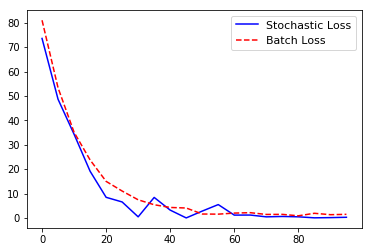

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()